In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import json

sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))

In [62]:
lines = open("/checkpoint/armenag/codex/logs/train.log", "r").readlines()

def parse_lines(lines):
    ret = []
    for line in lines:
        line = line.strip().split("|")[-1].strip()
        try:
            parsed = json.loads(line)
            ret.append(parsed)
        except:
            continue
    return ret

lines = parse_lines(lines)

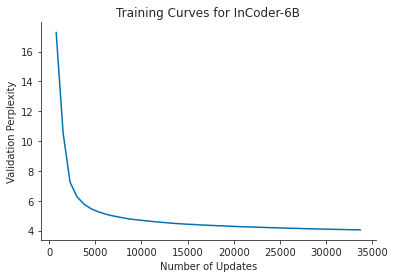

In [76]:
import pandas as pd

log_frame = pd.DataFrame(lines)
log_frame = log_frame[["valid_num_updates", "valid_ppl"]]
log_frame.dropna(inplace=True)
log_frame = log_frame.astype(float)
graph = sns.lineplot(data=log_frame,x="valid_num_updates",y="valid_ppl")
graph.set(xlabel ="Number of Updates", ylabel = "Validation Perplexity", title ='Training Curves for InCoder-6B')
sns.despine()

plt.savefig("resources/training_ppl.pdf")

In [53]:
plt.show()